1. YOLOv8 - Treinamento e Inferência

In [1]:
!pip install pytesseract ultralytics
!pip install -U transformers datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
from ultralytics import YOLO
from google.colab import files
import os, zipfile, random, shutil, csv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Upload e extração do dataset YOLO
uploaded = files.upload()
!unzip /content/anotacoes_projeto.v1i.yolov8.zip -d /content/cars-br

Saving anotacoes_projeto.v1i.yolov8.zip to anotacoes_projeto.v1i.yolov8.zip
Archive:  /content/anotacoes_projeto.v1i.yolov8.zip
  inflating: /content/cars-br/README.roboflow.txt  
  inflating: /content/cars-br/data.yaml  
   creating: /content/cars-br/test/
   creating: /content/cars-br/test/images/
 extracting: /content/cars-br/test/images/img_002041_jpg.rf.5cd8233d4455f96ad1cf7bb1e66e3ea9.jpg  
 extracting: /content/cars-br/test/images/img_002067_jpg.rf.37c783538a9abfd910b38fd0ae029a92.jpg  
 extracting: /content/cars-br/test/images/img_002091_jpg.rf.2f218fa2f9be991bb3de1e5551ffe844.jpg  
 extracting: /content/cars-br/test/images/img_002094_jpg.rf.8ce6b15f8f349baac249f70342c8c132.jpg  
 extracting: /content/cars-br/test/images/img_002095_jpg.rf.067ec2bd81c732b0e38620489da5ba3f.jpg  
 extracting: /content/cars-br/test/images/img_002096_jpg.rf.84097e94dc9d2c70c9adad40ee94e05d.jpg  
 extracting: /content/cars-br/test/images/img_002110_jpg.rf.e97ea03f7ad22a609917cd7736c2361f.jpg  
 extra

In [4]:
# Treinar YOLOv8
model = YOLO("yolov8n.yaml")
results = model.train(data="/content/cars-br/data.yaml", epochs=75, imgsz=640, pretrained=False)
model = YOLO("/content/runs/detect/train/weights/best.pt")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cars-br/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 96.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 255MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1319.7±640.6 MB/s, size: 54.9 KB)


train: Scanning /content/cars-br/train/labels... 1201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1201/1201 [00:00<00:00, 1573.95it/s]

train: New cache created: /content/cars-br/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 869.5±452.2 MB/s, size: 42.6 KB)


val: Scanning /content/cars-br/valid/labels... 265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 265/265 [00:00<00:00, 1250.97it/s]

val: New cache created: /content/cars-br/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      2.12G      4.222      6.722      3.712          2        640: 100%|██████████| 76/76 [00:09<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.25it/s]

                   all        265        265          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      2.66G      2.632      3.154       2.21          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]


                   all        265        265      0.543      0.272      0.314      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.67G      2.111      1.896      1.768          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]


                   all        265        265      0.847      0.734      0.805      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      2.69G      1.814      1.336      1.545          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]


                   all        265        265      0.932      0.921      0.971      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      2.71G      1.714      1.114      1.474          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        265        265      0.981      0.966      0.988      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      2.72G      1.605     0.9609      1.382          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]

                   all        265        265      0.989      0.981      0.994        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      2.74G      1.637     0.9107      1.388          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.40it/s]

                   all        265        265      0.996      0.988      0.994       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      2.76G      1.567     0.8462      1.375          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]

                   all        265        265       0.99      0.992      0.995      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      2.78G      1.518      0.841      1.313          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.37it/s]

                   all        265        265      0.998      0.992      0.995      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      2.79G      1.509     0.7497      1.306          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        265        265          1      0.998      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      2.81G      1.459     0.7257      1.301          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]

                   all        265        265      0.993      0.985      0.994      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      2.83G      1.414     0.6837      1.258          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.71it/s]

                   all        265        265          1      0.992      0.995      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      2.84G      1.461     0.6778      1.278          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.62it/s]

                   all        265        265      0.991      0.992      0.991      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      2.86G       1.43     0.6451      1.262          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.65it/s]

                   all        265        265      0.998      0.992      0.995      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      2.88G      1.389     0.6292      1.224          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        265        265      0.996      0.996      0.995      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75       2.9G      1.385     0.6293      1.227          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.57it/s]

                   all        265        265      0.996      0.985      0.995      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      2.91G      1.405     0.6211      1.245          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.72it/s]

                   all        265        265      0.999      0.992      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      2.93G      1.418     0.6262       1.25          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        265        265      0.878      0.981      0.879      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      2.95G      1.393     0.5885      1.241          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.66it/s]

                   all        265        265      0.703      0.989      0.709      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      2.96G      1.414     0.6121      1.248          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.50it/s]

                   all        265        265      0.999      0.992      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      2.98G      1.382      0.591       1.23          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.35it/s]

                   all        265        265      0.998      0.989      0.995      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75         3G      1.397     0.5847       1.23          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.79it/s]

                   all        265        265          1      0.982      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      3.02G      1.359     0.5693      1.204          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        265        265      0.996      0.992      0.995      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      3.03G      1.366     0.5738      1.226          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        265        265      0.994      0.992      0.991      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      3.05G      1.346     0.5562      1.213          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        265        265      0.993      0.992      0.995      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      3.07G      1.354     0.5471       1.21          4        640: 100%|██████████| 76/76 [00:06<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.42it/s]

                   all        265        265      0.996      0.992      0.995      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      3.08G      1.339     0.5618      1.218          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]

                   all        265        265      0.953      0.989       0.96      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75       3.1G      1.348     0.5591      1.201          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.73it/s]

                   all        265        265      0.811      0.985      0.811      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      3.12G      1.348     0.5579      1.217          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        265        265      0.943      0.994      0.948      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      3.13G       1.36     0.5537      1.195          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]

                   all        265        265      0.804      0.989      0.803      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      3.15G      1.344     0.5538      1.206          4        640: 100%|██████████| 76/76 [00:06<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.50it/s]

                   all        265        265          1      0.992      0.995       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      3.17G      1.356     0.5441      1.231          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.75it/s]

                   all        265        265      0.746      0.989      0.755      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      3.19G      1.357     0.5377      1.211          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]

                   all        265        265      0.804      0.989      0.807      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75       3.2G      1.337     0.5347      1.191          3        640: 100%|██████████| 76/76 [00:06<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.57it/s]

                   all        265        265      0.998      0.992      0.995      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      3.22G      1.321     0.5212      1.202          4        640: 100%|██████████| 76/76 [00:06<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.40it/s]

                   all        265        265      0.965      0.992      0.962      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      3.24G       1.34     0.5286      1.199          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]

                   all        265        265      0.988      0.992      0.984      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      3.25G      1.352     0.5386      1.204          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.90it/s]

                   all        265        265      0.939      0.991       0.94      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      3.27G      1.331     0.5107       1.19          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.48it/s]

                   all        265        265       0.96      0.989      0.962      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      3.29G      1.315     0.5178      1.187          3        640: 100%|██████████| 76/76 [00:06<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.52it/s]

                   all        265        265      0.995      0.992      0.995      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      3.31G      1.342     0.5219      1.207          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        265        265      0.999      0.992      0.995      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      3.32G      1.322     0.5091      1.199          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.69it/s]

                   all        265        265      0.958      0.992      0.955      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      3.34G       1.32     0.5173      1.202          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.22it/s]

                   all        265        265      0.992      0.992       0.99      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      3.36G      1.315     0.5089      1.201          3        640: 100%|██████████| 76/76 [00:06<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.65it/s]

                   all        265        265      0.902      0.992      0.902      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      3.38G       1.33     0.5117      1.198          4        640: 100%|██████████| 76/76 [00:06<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.41it/s]

                   all        265        265      0.994      0.996      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      3.39G      1.303     0.5081      1.181          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]

                   all        265        265      0.996      0.996      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      3.41G      1.332     0.5155        1.2          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.76it/s]

                   all        265        265      0.949      0.992      0.946      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      3.43G      1.323     0.4928      1.199          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.72it/s]

                   all        265        265      0.956      0.991      0.955      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      3.44G      1.307     0.4997      1.182          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.72it/s]

                   all        265        265      0.941      0.992      0.938      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      3.46G      1.335     0.5154      1.199          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.90it/s]

                   all        265        265      0.862      0.989      0.863      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      3.48G      1.337     0.5017      1.199          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]

                   all        265        265      0.957      0.992      0.961      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      3.49G        1.3     0.4923      1.188          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.63it/s]

                   all        265        265      0.999      0.989      0.995      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      3.51G      1.318     0.4966      1.198          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.74it/s]

                   all        265        265      0.732      0.989      0.734      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      3.53G      1.304     0.4957      1.195          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.94it/s]

                   all        265        265      0.999      0.992      0.995      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      3.54G      1.288     0.4901      1.181          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.61it/s]

                   all        265        265      0.987      0.992      0.984      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      3.56G      1.291     0.4853       1.18          4        640: 100%|██████████| 76/76 [00:06<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.70it/s]

                   all        265        265      0.991      0.992      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      3.58G        1.3     0.4973      1.184          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.69it/s]

                   all        265        265      0.988      0.992      0.984      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75       3.6G      1.298     0.4872      1.204          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.82it/s]

                   all        265        265      0.903      0.992      0.905      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      3.61G      1.308     0.4832      1.183          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.61it/s]

                   all        265        265        0.9      0.992      0.899      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      3.63G      1.263      0.479      1.157          2        640: 100%|██████████| 76/76 [00:06<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]

                   all        265        265      0.932      0.992      0.935      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      3.65G      1.274     0.4729      1.167          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        265        265      0.956      0.992      0.952      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      3.66G      1.259     0.4633      1.158          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.73it/s]

                   all        265        265      0.958      0.992      0.955      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      3.68G      1.272     0.4654      1.167          0        640: 100%|██████████| 76/76 [00:06<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.80it/s]

                   all        265        265      0.983      0.992       0.98      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75       3.7G      1.258     0.4619      1.161          3        640: 100%|██████████| 76/76 [00:06<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.74it/s]

                   all        265        265      0.995      0.992      0.991      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      3.71G      1.271     0.4671      1.168          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        265        265      0.943      0.992      0.941      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      3.73G      1.279     0.4628      1.147          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.76it/s]

                   all        265        265      0.901      0.992      0.902       0.59


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      3.75G      1.275     0.4309      1.277          1        640: 100%|██████████| 76/76 [00:07<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.41it/s]

                   all        265        265       0.97      0.992      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      3.77G       1.26     0.4228      1.259          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        265        265      0.983      0.992       0.98      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      3.78G      1.249     0.4184      1.257          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]

                   all        265        265      0.966      0.992      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75       3.8G      1.262     0.4267       1.26          1        640: 100%|██████████| 76/76 [00:06<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.70it/s]

                   all        265        265      0.978      0.992      0.976      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      3.82G      1.261     0.4289      1.251          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.94it/s]

                   all        265        265      0.984      0.992       0.98      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      3.84G      1.251     0.4142      1.254          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.80it/s]

                   all        265        265      0.994      0.992      0.991      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      3.85G      1.238     0.4117      1.241          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]

                   all        265        265      0.995      0.992      0.995      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      3.87G      1.244     0.4183      1.261          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.69it/s]

                   all        265        265      0.996      0.992      0.991      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      3.89G      1.242     0.4118      1.249          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.71it/s]

                   all        265        265      0.995      0.992      0.991      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75       3.9G      1.234     0.4085      1.247          1        640: 100%|██████████| 76/76 [00:06<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.95it/s]

                   all        265        265      0.991      0.992      0.991      0.663



75 epochs completed in 0.165 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]


                   all        265        265      0.995      0.992      0.995      0.673
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


In [5]:
# Avaliação
metrics = model.val(data="/content/cars-br/data.yaml")
print(f"Map50-95: {metrics.box.map:.4f} | Map50: {metrics.box.map50:.4f} | Map75: {metrics.box.map75:.4f}")

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1623.5±634.4 MB/s, size: 48.4 KB)


val: Scanning /content/cars-br/valid/labels.cache... 265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 265/265 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  7.05it/s]


                   all        265        265      0.995      0.992      0.995      0.675
Speed: 0.8ms preprocess, 1.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
Map50-95: 0.6748 | Map50: 0.9949 | Map75: 0.8242


In [6]:
# Inferência
results = model.predict(source="/content/cars-br/test/images", save=True, conf=0.25)


image 1/94 /content/cars-br/test/images/img_002041_jpg.rf.5cd8233d4455f96ad1cf7bb1e66e3ea9.jpg: 640x640 1 plates, 7.2ms
image 2/94 /content/cars-br/test/images/img_002067_jpg.rf.37c783538a9abfd910b38fd0ae029a92.jpg: 640x640 1 plates, 7.9ms
image 3/94 /content/cars-br/test/images/img_002091_jpg.rf.2f218fa2f9be991bb3de1e5551ffe844.jpg: 640x640 1 plates, 8.3ms
image 4/94 /content/cars-br/test/images/img_002094_jpg.rf.8ce6b15f8f349baac249f70342c8c132.jpg: 640x640 1 plates, 7.6ms
image 5/94 /content/cars-br/test/images/img_002095_jpg.rf.067ec2bd81c732b0e38620489da5ba3f.jpg: 640x640 1 plates, 7.7ms
image 6/94 /content/cars-br/test/images/img_002096_jpg.rf.84097e94dc9d2c70c9adad40ee94e05d.jpg: 640x640 1 plates, 9.8ms
image 7/94 /content/cars-br/test/images/img_002110_jpg.rf.e97ea03f7ad22a609917cd7736c2361f.jpg: 640x640 2 platess, 7.5ms
image 8/94 /content/cars-br/test/images/img_002159_jpg.rf.40634184c6711925edf842445759e430.jpg: 640x640 1 plates, 7.6ms
image 9/94 /content/cars-br/test/image

2. OCR - Organização, CSV e Fine-Tuning

In [7]:
# Upload do dataset de placas
uploaded = files.upload()
with zipfile.ZipFile("trOCR.zip", 'r') as zip_ref:
    zip_ref.extractall("anotacoes_ocr")

Saving trOCR.zip to trOCR.zip


In [8]:
# Separação dos dados
base_dir = "/content/anotacoes_ocr/trOCR"
output_dir = "/content/split_data_ocr"
img_exts = ('.jpg', '.jpeg', '.png')
files = [f for f in os.listdir(base_dir) if f.lower().endswith(img_exts)]
paired = [f for f in files if os.path.exists(os.path.join(base_dir, f.rsplit('.', 1)[0] + '.txt'))]
random.shuffle(paired)

n = len(paired)
splits = {
    "train": paired[:int(n * 0.8)],
    "val": paired[int(n * 0.8):int(n * 0.9)],
    "test": paired[int(n * 0.9):]
}

for split in splits:
    os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)
    for f in splits[split]:
        shutil.copy2(os.path.join(base_dir, f), os.path.join(output_dir, split, "images", f))
        shutil.copy2(os.path.join(base_dir, f.replace(".jpg", ".txt")), os.path.join(output_dir, split, "labels", f.replace(".jpg", ".txt")))


In [9]:
# Gerar CSVs para OCR supervisionado
for split in ["train", "val", "test"]:
    folder_path = os.path.join(output_dir, split, "images")
    label_path = os.path.join(output_dir, split, "labels")
    csv_path = os.path.join(output_dir, f"{split}.csv")
    rows = []
    for file in os.listdir(folder_path):
        if file.lower().endswith(img_exts):
            txt_path = os.path.join(label_path, file.rsplit('.', 1)[0] + ".txt")
            if os.path.exists(txt_path):
                with open(txt_path, 'r') as f:
                    for line in f:
                        if line.lower().startswith("plate:"):
                            rows.append([os.path.join(folder_path, file), line.split("plate:")[1].strip()])
                            break
    with open(csv_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["image_path", "text"])
        writer.writerows(rows)

3. OCR com TrOCR + Comparativo com o Tesseract + Métricas

In [13]:
from PIL import Image
import os
import cv2
import torch
import pytesseract
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from ultralytics import YOLO

# 📦 Carregamento dos modelos
yolo_model = YOLO("/content/runs/detect/train/weights/best.pt")  # Modelo YOLOv8 treinado
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")  # Tokenizador e pré-processador
model_trocr = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed").to("cuda" if torch.cuda.is_available() else "cpu")

# 💻 Define o dispositivo (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📁 Diretórios de saída
output_crop_path = "/content/cropped_plates"
output_annotated_path = "/content/output_with_ocr"
os.makedirs(output_crop_path, exist_ok=True)
os.makedirs(output_annotated_path, exist_ok=True)

# 🧠 Função para detectar placas e aplicar OCR
def detect_and_trocr(image_path, save_crop=True, save_annotated=True):
    img = cv2.imread(image_path)
    results = yolo_model(img)[0]
    ocr_results = []

    if results.boxes is None or results.boxes.xyxy is None:
        return []

    for i, box in enumerate(results.boxes.xyxy.cpu().numpy()):
        x1, y1, x2, y2 = map(int, box.tolist())
        margin = 5
        x1 = max(x1 - margin, 0)
        y1 = max(y1 - margin, 0)
        x2 = min(x2 + margin, img.shape[1])
        y2 = min(y2 + margin, img.shape[0])

        cropped_plate = img[y1:y2, x1:x2]

        # --- OCR com TrOCR ---
        cropped_pil = Image.fromarray(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB)).convert("RGB")
        cropped_pil_resized = cropped_pil.resize((320, 80))
        pixel_values = processor(images=cropped_pil_resized, return_tensors="pt").pixel_values.to(device)
        with torch.no_grad():
            generated_ids = model_trocr.generate(pixel_values)
            trocr_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

        # --- OCR com Tesseract ---
        gray = cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        tesseract_text = pytesseract.image_to_string(thresh, config='--psm 7').strip()

        # Salva os resultados OCR
        ocr_results.append((x1, y1, x2, y2, trocr_text, tesseract_text))

        filename = os.path.basename(image_path).split('.')[0]
        if save_crop:
            cv2.imwrite(f"{output_crop_path}/{filename}_crop_{i}.jpg", cropped_plate)

        if save_annotated:
            annotated_text = f"T: {trocr_text} | S: {tesseract_text}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, annotated_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    if save_annotated:
        cv2.imwrite(f"{output_annotated_path}/{os.path.basename(image_path)}", img)

    return ocr_results


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
images_path = "/content/split_data_ocr/test/images"
test_images = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.png'))]

for img_name in test_images:
    img_path = os.path.join(images_path, img_name)
    results = detect_and_trocr(img_path)
    print(f"\n🔍 {img_name}")
    if results:
        for box in results:
            print(f"📌 BBox: {box[:4]}")
            print(f"🧠 TrOCR: {box[4]}")
            print(f"📝 Tesseract: {box[5]}")
    else:
        print("Nenhuma placa detectada.")


0: 384x640 1 plates, 48.3ms
Speed: 2.1ms preprocess, 48.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

🔍 img_001284.jpg
📌 BBox: (541, 382, 687, 455)
🧠 TrOCR: ORD: 1477
📝 Tesseract: “ong (477!

0: 384x640 1 plates, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

🔍 img_000533.jpg
📌 BBox: (606, 241, 713, 303)
🧠 TrOCR: PPA 8526)
📝 Tesseract: on 6

0: 384x640 1 plates, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

🔍 img_000840.jpg
📌 BBox: (632, 291, 742, 350)
🧠 TrOCR: DYK 7891
📝 Tesseract: OyYK 7831

0: 384x640 1 plates, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

🔍 img_000711.jpg
📌 BBox: (594, 288, 721, 362)
🧠 TrOCR: OUR 3127,
📝 Tesseract: O0R-3127

0: 384x640 1 plates, 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

🔍 img_000101.jpg
📌 BBox: (6

In [22]:
!pip install python-Levenshtein

In [32]:
import os
import csv

# Diretórios
test_images_dir = "/content/split_data_ocr/test/images"
test_labels_dir = "/content/split_data_ocr/test/labels"

# 1. Função para limpar texto
def clean_plate_text(text):
    if text is None:
        return ""
    return ''.join(c for c in text.upper() if c.isalnum())

# 2. Ler ground truth dos arquivos .txt
ground_truth = {}
for txt_file in os.listdir(test_labels_dir):
    if txt_file.endswith(".txt"):
        img_name = txt_file.replace(".txt", ".jpg")  # ajuste conforme extensão real
        with open(os.path.join(test_labels_dir, txt_file), "r") as f:
            for line in f:
                if line.lower().startswith("plate:"):
                    plate = line.split("plate:")[1].strip()
                    ground_truth[img_name] = clean_plate_text(plate)
                    break

# 3. Rodar OCR para todas imagens de teste, salvar resultados num dicionário
predicted = {}
for img_name in os.listdir(test_images_dir):
    if not img_name.lower().endswith(('.jpg','.jpeg','.png')):
        continue
    img_path = os.path.join(test_images_dir, img_name)
    ocr_results = detect_and_trocr(img_path, save_crop=False, save_annotated=False)

    # Caso haja múltiplas detecções, considere só a primeira placa
    if ocr_results:
        trocr_text = clean_plate_text(ocr_results[0][4])  # texto do TrOCR
        predicted[img_name] = trocr_text
    else:
        predicted[img_name] = ""  # Nenhuma placa detectada

# 4. Avaliação: comparar predicted vs ground_truth

from sklearn.metrics import accuracy_score
import Levenshtein

imgs = list(ground_truth.keys())
gt_clean = [ground_truth[img] for img in imgs]
pred_clean = [predicted.get(img, "") for img in imgs]

acc = accuracy_score(gt_clean, pred_clean)
print(f"Acurácia exata: {acc:.2%}")

def normalized_levenshtein(s1, s2):
    if len(s1) == 0 and len(s2) == 0:
        return 1.0
    dist = Levenshtein.distance(s1, s2)
    max_len = max(len(s1), len(s2))
    return 1 - dist / max_len

similarities = [normalized_levenshtein(g, p) for g, p in zip(gt_clean, pred_clean)]
avg_similarity = sum(similarities) / len(similarities)
print(f"Similaridade média (Levenshtein normalizada): {avg_similarity:.2%}")

print("\nErros encontrados:")
for img, gt, pred in zip(imgs, gt_clean, pred_clean):
    if gt != pred:
        print(f"Erro na {img}: esperado='{gt}', previsto='{pred}'")



0: 384x640 1 plates, 10.4ms
Speed: 3.1ms preprocess, 10.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 plates, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 plates, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 plates, 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 plates, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 plates, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 plates, 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 plates, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 38

In [33]:
from collections import Counter

def character_confusion_matrix(gt_list, pred_list):
    confusion = Counter()

    for gt, pred in zip(gt_list, pred_list):
        # Usar o tamanho mínimo para comparar
        length = min(len(gt), len(pred))
        for i in range(length):
            if gt[i] != pred[i]:
                confusion[(gt[i], pred[i])] += 1
        # Caso gt maior que pred, considerar erros de omissão
        for c in gt[length:]:
            confusion[(c, None)] += 1
        # Caso pred maior que gt, considerar erros de inserção
        for c in pred[length:]:
            confusion[(None, c)] += 1
    return confusion

# Exemplo de uso
confusions = character_confusion_matrix(gt_clean, pred_clean)

# Mostrar os pares mais comuns
print("Principais confusões de caracteres:")
for (c1, c2), count in confusions.most_common(10):
    print(f"'{c1}' -> '{c2}' : {count} vezes")


Principais confusões de caracteres:
'O' -> '0' : 11 vezes
'6' -> 'None' : 10 vezes
'Q' -> 'O' : 10 vezes
'8' -> 'None' : 9 vezes
'7' -> 'None' : 9 vezes
'2' -> 'None' : 8 vezes
'0' -> 'None' : 7 vezes
'3' -> 'None' : 7 vezes
'0' -> 'O' : 7 vezes
'9' -> 'S' : 6 vezes


In [34]:
def clean_plate_text(text):
    if text is None:
        return ""
    text = text.upper()
    # Remover símbolos comuns
    for ch in ['#', '-', ' ', ',', '.', '(', ')', '[', ']', '_', ':']:
        text = text.replace(ch, '')
    # Substituir caracteres confusos (exemplo)
    substitutions = {
        '0': 'O',  # só se fizer sentido no contexto da placa
        '1': 'I',
        '5': 'S',
        '8': 'B',
        # ajuste conforme padrão da sua base
    }
    for k, v in substitutions.items():
        text = text.replace(k, v)
    # Manter só letras e números
    text = ''.join(c for c in text if c.isalnum())
    return text


In [35]:
import re

def correct_plate_format(text):
    # Exemplo: tentar extrair 3 letras e 4 números
    match = re.match(r'([A-Z]{3})(\d{4})', text)
    if match:
        return match.group(1) + match.group(2)
    else:
        # Tentar corrigir com regex aproximado, ou retornar texto original
        return text


In [36]:
# Limpar textos com substituições
gt_clean = [clean_plate_text(ground_truth.get(img, "")) for img in ground_truth.keys()]
pred_clean = [clean_plate_text(predicted.get(img, "")) for img in ground_truth.keys()]

# Corrigir formato
gt_clean = [correct_plate_format(t) for t in gt_clean]
pred_clean = [correct_plate_format(t) for t in pred_clean]

# Calcular métricas
acc = accuracy_score(gt_clean, pred_clean)
print(f"Acurácia exata corrigida: {acc:.2%}")

# Matriz de confusão
confusions = character_confusion_matrix(gt_clean, pred_clean)
print("Principais confusões de caracteres:")
for (c1, c2), count in confusions.most_common(10):
    print(f"'{c1}' -> '{c2}' : {count} vezes")


Acurácia exata corrigida: 33.33%
Principais confusões de caracteres:
'Q' -> 'O' : 13 vezes
'6' -> 'None' : 10 vezes
'B' -> 'None' : 9 vezes
'7' -> 'None' : 9 vezes
'2' -> 'None' : 8 vezes
'O' -> 'D' : 7 vezes
'O' -> 'None' : 7 vezes
'3' -> 'None' : 7 vezes
'9' -> 'S' : 6 vezes
'D' -> 'O' : 6 vezes


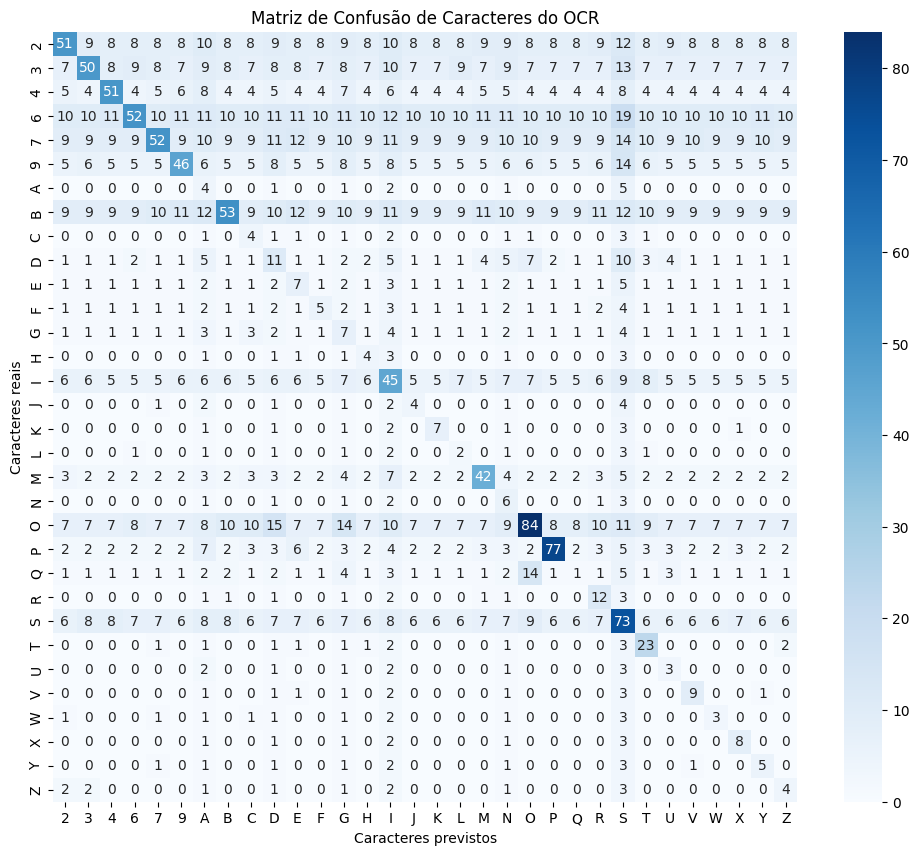

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def build_confusion_matrix_chars(gt_list, pred_list):
    chars = set()
    # Primeiro, pegar todos os caracteres únicos do conjunto
    for text in gt_list + pred_list:
        for c in text:
            chars.add(c)
    chars = sorted(chars)

    # Mapeamento char -> índice
    char_to_idx = {c: i for i, c in enumerate(chars)}

    # Inicializar matriz de confusão
    matrix = np.zeros((len(chars), len(chars)), dtype=int)

    for gt, pred in zip(gt_list, pred_list):
        length = min(len(gt), len(pred))
        for i in range(length):
            gt_c = gt[i]
            pred_c = pred[i]
            matrix[char_to_idx[gt_c], char_to_idx[pred_c]] += 1
        # Considerar erros de omissão (char esperado, mas não previsto)
        for c in gt[length:]:
            matrix[char_to_idx[c], :] += 1  # conta como erro geral (pode adaptar)
        # Considerar erros de inserção (char previsto, mas não esperado)
        for c in pred[length:]:
            matrix[:, char_to_idx[c]] += 1  # conta como erro geral (pode adaptar)

    return matrix, chars

# Exemplo de uso com listas já limpas (gt_clean e pred_clean)
matrix, labels = build_confusion_matrix_chars(gt_clean, pred_clean)

# Visualizar com heatmap
plt.figure(figsize=(12,10))
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Caracteres previstos')
plt.ylabel('Caracteres reais')
plt.title('Matriz de Confusão de Caracteres do OCR')
plt.show()
